# Codenation - Data Science
<pre>Autor: Leonardo Simões</pre>


## Desafio 4 - Funções de probabilidade

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

### Tópicos

Neste desafios nós vamos explorar:
- Probabilidade
- Estatística
- Testes de hipóteses
- Testes A/B

### Questões
<pre>
1) Considerando uma amostra de tamanho 3000 da coluna height obtida com a função get_sample(), execute o 
teste de normalidade de Shapiro-Wilk com a função scipy.stats.shapiro(). Podemos afirmar que as alturas 
são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? 
Responda com um boolean (True ou False).

2) Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da 
função scipy.stats.jarque_bera(). Agora podemos afirmar que as alturas são normalmente distribuídas (ao 
nível de significância de 5%)? Responda com um boolean (True ou False).

3) Considerando agora uma amostra de tamanho 3000 da coluna weight obtida com a função get_sample(). 
Faça o teste de normalidade de D'Agostino-Pearson utilizando a função scipy.stats.normaltest(). 
Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? 
Responda com um boolean (True ou False).

4) Realize uma transformação logarítmica em na amostra de weight da questão 3 e repita o mesmo procedimento. 
Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? 
Responda com um boolean (True ou False).

5) Obtenha todos atletas brasileiros, norte-americanos e canadenses em DataFrames chamados bra, usa e can,
respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (height) para 
amostras independentes e variâncias diferentes com a função scipy.stats.ttest_ind() entre bra e usa. 
Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (True ou False).

6) Repita o procedimento da questão 5, mas agora entre as alturas de bra e can. 
Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (True ou False).

7) Repita o procedimento da questão 6, mas agora entre as alturas de usa e can. 
Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.
</pre>



## _Setup_ geral

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [28]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [29]:
athletes = pd.read_csv("athletes.csv")

In [30]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Análise dos dados

In [31]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [32]:
athletes.shape

(11538, 11)

In [33]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [34]:
def q1():
    samples = get_sample(df=athletes, col_name='height', n=3000)
    return sct.shapiro(samples)[1] > 0.05
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

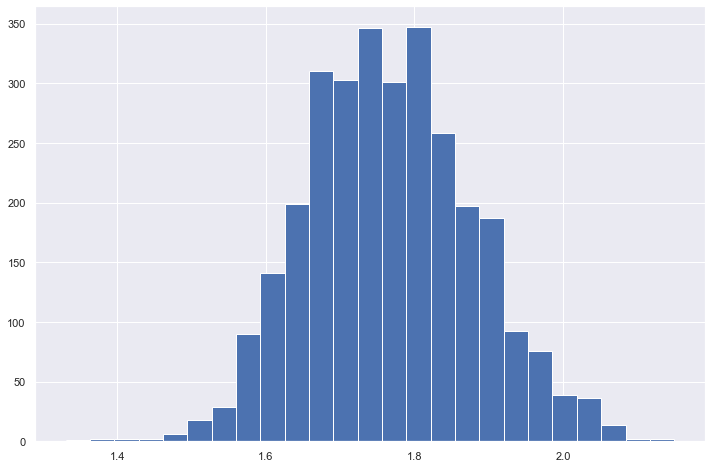

In [35]:
samples = get_sample(df=athletes, col_name='height', n=3000)
samples.hist(bins=25);

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [36]:
def q2():
    samples = get_sample(df=athletes, col_name='height', n=3000)
    return bool(sct.jarque_bera(samples)[1] > 0.05)
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [37]:
def q3():
    samples = get_sample(df=athletes, col_name='weight', n=3000)
    return bool(sct.normaltest(samples)[1] > 0.05)
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

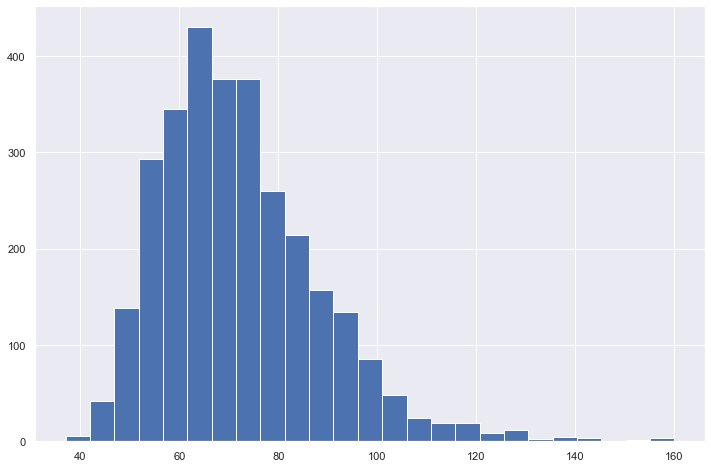

In [38]:
samples = get_sample(df=athletes, col_name='weight', n=3000)
samples.hist(bins=25);

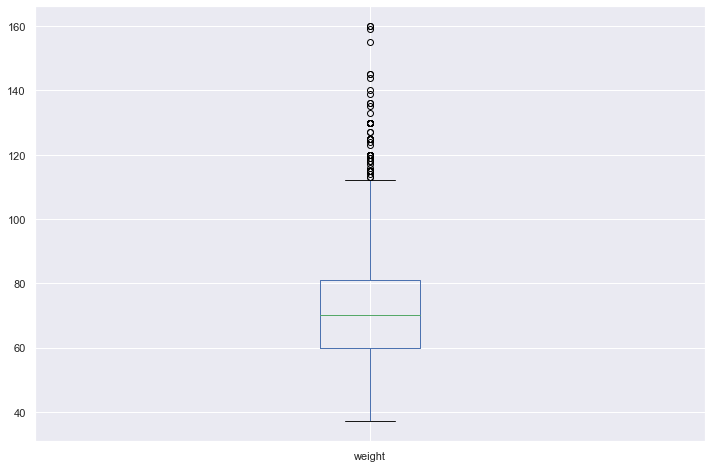

In [39]:
samples.plot.box();

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [40]:
def q4():
    samples = get_sample(df=athletes, col_name='weight', n=3000)
    samples_log = np.log(samples)
    return bool(sct.normaltest(samples_log)[1] > 0.05)
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

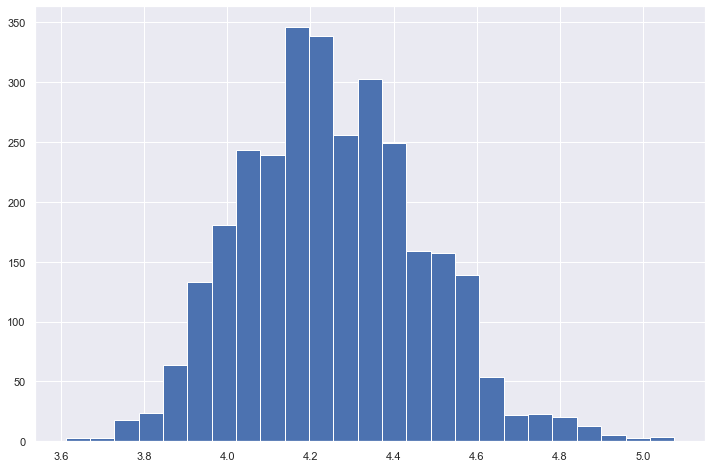

In [41]:
samples = get_sample(df=athletes, col_name='weight', n=3000)
samples_log = np.log(samples)
samples_log.hist(bins=25);

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

In [42]:
bra = athletes.query('nationality=="BRA"')
bra.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
79,236523132,Adam Imer,BRA,male,8/18/89,1.82,88.0,hockey,0,0,0
106,993710181,Adenizia da Silva,BRA,female,12/18/86,1.87,65.0,volleyball,0,0,0
109,930618704,Adilson da Silva,BRA,male,1/24/72,1.70,79.0,golf,0,0,0
114,787208883,Adrian Baches,BRA,male,4/7/90,1.84,83.0,aquatics,0,0,0
128,80367651,Adriana Aparecida da Silva,BRA,female,7/22/81,1.66,52.0,athletics,0,0,0


In [43]:
usa = athletes.query('nationality=="USA"')
usa.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
13,376068084,Abbey D'Agostino,USA,female,5/25/92,1.61,49.0,athletics,0,0,0
14,162792594,Abbey Weitzeil,USA,female,12/3/96,1.78,68.0,aquatics,1,1,0
64,884912136,Abigail Johnston,USA,female,11/16/89,1.66,61.0,aquatics,0,0,0
104,259002430,Adeline Maria Gray,USA,female,1/15/91,1.73,77.0,wrestling,0,0,0


In [44]:
can = athletes.query('nationality=="CAN"')
can.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
77,136977152,Adam Froese,CAN,male,8/13/91,1.82,81.0,hockey,0,0,0
92,983411298,Adam van Koeverden,CAN,male,1/29/82,1.82,85.0,canoe,0,0,0
238,769580282,Akeem Haynes,CAN,male,3/11/92,1.68,71.0,athletics,0,0,1
332,84230211,Alena Sharp,CAN,female,3/7/81,1.68,69.0,golf,0,0,0


## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [45]:
def q5():
    bra_height = bra["height"].dropna()
    usa_height = usa["height"].dropna()
    bra_usa = sct.ttest_ind(bra_height, usa_height, equal_var=False)
    return bool(bra_usa[1]>0.05)
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [46]:
def q6():
    bra_height = bra["height"].dropna()
    can_height = can["height"].dropna()
    bra_can = sct.ttest_ind(bra_height, can_height, equal_var=False)
    return bool(bra_can[1]>0.05)
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [47]:
def q7():
    usa_height = usa["height"].dropna()
    can_height = can["height"].dropna()
    usa_can = sct.ttest_ind(usa_height, can_height, equal_var=False)
    return float(round(usa_can[1],8))
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?